# Full SSN community detection

In [1]:
import networkx as nx
import community
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import random

In [1]:
import pandas as pd

In [16]:
import ast

## Load the network

In [4]:
ssn_path ='../ssn/50_filtered_5/all_filtered_5_unique_no_stop_50_with_char_ssn_e50.txt'

In [5]:
edge_list = []
with open(ssn_path, 'r') as in_file:
    for line in in_file.readlines():
        edge_list.append(line.split()[:2])

In [6]:
G = nx.Graph(edge_list)

## Community detection - get clusters

In [7]:
# Detect communities using Louvain method
partition = community.best_partition(G)

In [8]:
clusters = []
for value in  set(partition.values()):
    cluster = [node for node, cluster in partition.items() if cluster == value]
    clusters.append(cluster)

In [9]:
len(clusters)

1475

In [16]:
# FIXME: for cluster size calculation, use also information how many sequences a represnetative sequence represents
big_clusters = [cluster for cluster in clusters if len(cluster) > 30]

In [17]:
len(big_clusters)

51

In [10]:
pd.DataFrame.from_dict(partition, orient='index').to_csv('../ssn/50_filtered_5/ssn_community_detection_cluster_assignment.csv')

In [11]:
pd.DataFrame.from_dict(partition, orient='index').to_csv('ssn_community_detection_cluster_assignment.csv')

In [23]:
# Generating different colors in RGB format
num_colors = len(big_clusters)
colors = plt.cm.rainbow(np.linspace(0, 1, num_colors))
#random.shuffle(colors)
colors_hex = [ "#{:02x}{:02x}{:02x}".format(int(r * 255), int(g * 255), int(b * 255)) for r, g, b, _ in colors]

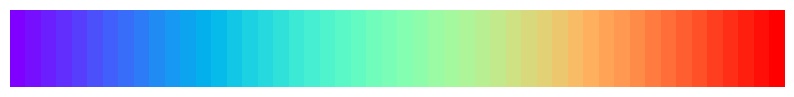

In [24]:
fig, ax = plt.subplots(figsize=(10, 1))
ax.imshow([colors], aspect='auto', extent=[0, num_colors, 0, 1])
ax.set_axis_off()

In [26]:
random.shuffle(colors_hex)

## Cluster information

### Cluster assignment

For sequences in the network, we get the assignment to clusters directly

In [53]:
cluster_assignment_df1 = pd.DataFrame.from_dict(partition, orient='index')

In [54]:
cluster_assignment_df1.head()

,0
onekp_000079,0
phytozome_004522,0
tsa_033370,0
uniprot_085406,0
uniprot_063519,0


For sequences which are represented by the cluster representative, we need to get the assignment indirectly

In [24]:
cluster_info = '../clustering/50_identity/all_filtered_5_unique_no_stop_50_clstr_info.tsv'
cluster_info_df = pd.read_csv(cluster_info, sep='\t', index_col=0)
# Sequences which do not represent other (ie cluster_size == 1) can be skipped, because they are already in the network
cluster_info_df = cluster_info_df[cluster_info_df['cluster_size'] != 1]

In [25]:
# Load the cluster members list as a list
cluster_info_df['cluster_members'] = cluster_info_df['cluster_members'].apply(lambda x:  ast.literal_eval(x))

In [27]:
cluster_info_df.head()

,cluster_name,cluster_size,cluster_representative,cluster_members_with_identities,average_identity,superkingdoms,Eukaryota_perc,Metagenome_perc,Archaea_perc,Bacteria_perc,...,most_common_pfam_arch,supfam_archs_count,most_common_supfam_arch,cluster_members,bfd_perc,tsa_perc,mgnify_perc,uniprot_perc,onekp_perc,phytozome_perc
0,Cluster_0,434,uniprot_092261,"onekp_013169 (50.75), onekp_013222 (51.70), on...",56.524631,"['Eukaryota', 'Eukaryota', 'Eukaryota', 'Eukar...",0.398618,0.596774,0.0,0.002304,...,['PF00494.22'],"Counter({""['0046340']"": 351, ""['0046340_partia...",['0046340'],"[onekp_013169, onekp_013222, onekp_013240, one...",0.569124,0.103687,0.029954,0.149770,0.145161,0.002304
1,Cluster_1,1015,uniprot_184506,"onekp_013190 (67.28), onekp_014992 (69.03), on...",63.733635,"['Eukaryota', 'Eukaryota', 'Eukaryota', 'Eukar...",0.922167,0.065025,0.0,0.000000,...,"['PF00494.22_partial', 'PF00494.22_partial']","Counter({""['0046340']"": 951, ""['0048806_partia...",['0046340'],"[onekp_013190, onekp_014992, onekp_017918, tsa...",0.048276,0.079803,0.017734,0.851232,0.002956,0.000000
2,Cluster_2,67,uniprot_232045,"tsa_044358 (100.00), tsa_044359 (98.53), tsa_0...",73.111940,"['Eukaryota', 'Eukaryota', 'Eukaryota', 'Eukar...",0.925373,0.074627,0.0,0.000000,...,NaN,"Counter({""['0048806_partial', '0046340']"": 35,...","['0048806_partial', '0046340']","[tsa_044358, tsa_044359, tsa_044364, uniprot_1...",0.000000,0.044776,0.074627,0.880597,0.000000,0.000000
3,Cluster_3,4972,uniprot_238978,"onekp_013136 (64.93), onekp_013137 (62.94), on...",59.703978,"['Eukaryota', 'Eukaryota', 'Eukaryota', 'Eukar...",0.695897,0.158286,0.0,0.115849,...,['PF03936.19_partial'],"Counter({""['0046340']"": 4892, ""['0046340_parti...",['0046340'],"[onekp_013136, onekp_013137, onekp_013157, one...",0.105994,0.286605,0.068986,0.306919,0.168343,0.063154
4,Cluster_4,28,mgnify_new_078054,"uniprot_129026 (73.72), uniprot_132729 (59.27)...",67.774643,"['unknown', 'Bacteria', 'Bacteria', 'Bacteria'...",0.000000,0.535714,0.0,0.357143,...,NaN,"Counter({""['0046340']"": 28})",['0046340'],"[uniprot_129026, uniprot_132729, uniprot_20743...",0.107143,0.000000,0.500000,0.392857,0.000000,0.000000


In [28]:
# Explode the df to get a sequence and its representative
cluster_assignment_df2 = cluster_info_df[['cluster_members', 'cluster_representative']].explode('cluster_members')

In [29]:
cluster_assignment_df2

,cluster_members,cluster_representative
0,onekp_013169,uniprot_092261
0,onekp_013222,uniprot_092261
0,onekp_013240,uniprot_092261
0,onekp_013241,uniprot_092261
0,onekp_013247,uniprot_092261
...,...,...
21250,bfd_000686,bfd_000685
21252,bfd_003204,bfd_003204
21252,bfd_003206,bfd_003204
21268,bfd_132927,bfd_132927


In [31]:
# Since for cluster representatives we have the cluster assignment, we can get the assignment for each sequence
cluster_assignment_df2 = cluster_assignment_df2.merge(cluster_assignment_df1, how='left', right_index=True, left_on='cluster_representative')

In [32]:
cluster_assignment_df2

,cluster_members,cluster_representative,0
0,onekp_013169,uniprot_092261,38
0,onekp_013222,uniprot_092261,38
0,onekp_013240,uniprot_092261,38
0,onekp_013241,uniprot_092261,38
0,onekp_013247,uniprot_092261,38
...,...,...,...
21250,bfd_000686,bfd_000685,268
21252,bfd_003204,bfd_003204,38
21252,bfd_003206,bfd_003204,38
21268,bfd_132927,bfd_132927,7


In [55]:
cluster_assignment_df1 = cluster_assignment_df1.rename(columns = {0: 'cluster'})

In [56]:
cluster_assignment_df1['represented_by'] = cluster_assignment_df1.index

In [57]:
cluster_assignment_df1

,cluster,represented_by
onekp_000079,0,onekp_000079
phytozome_004522,0,phytozome_004522
tsa_033370,0,tsa_033370
uniprot_085406,0,uniprot_085406
uniprot_063519,0,uniprot_063519
...,...,...
M5AW86,232,M5AW86
A0A140AZ72,121,A0A140AZ72
A0A140AZ69,121,A0A140AZ69
A0A140AZ63,13,A0A140AZ63


In [45]:
cluster_assignment_df2 = cluster_assignment_df2.rename(columns={'cluster_members': 'id', 'cluster_representative': 'represented_by', 0: 'cluster'})

In [49]:
cluster_assignment_df2 = cluster_assignment_df2.set_index('id')

In [60]:
cluster_assignment_df2

,represented_by,cluster
id,,
onekp_013169,uniprot_092261,38
onekp_013222,uniprot_092261,38
onekp_013240,uniprot_092261,38
onekp_013241,uniprot_092261,38
onekp_013247,uniprot_092261,38
...,...,...
bfd_000686,bfd_000685,268
bfd_003204,bfd_003204,38
bfd_003206,bfd_003204,38


In [73]:
cluster_assignment = pd.concat([cluster_assignment_df1, cluster_assignment_df2])

In [76]:
cluster_assignment = cluster_assignment.reset_index(names='id')

In [77]:
cluster_assignment.drop_duplicates()

,id,cluster,represented_by
0,onekp_000079,0,onekp_000079
1,phytozome_004522,0,phytozome_004522
2,tsa_033370,0,tsa_033370
3,uniprot_085406,0,uniprot_085406
4,uniprot_063519,0,uniprot_063519
...,...,...,...
620618,mgnify_new_174640,7,mgnify_new_097620
620619,mgnify_new_184970,7,mgnify_new_097620
620621,bfd_000686,268,bfd_000685
620623,bfd_003206,38,bfd_003204


In [131]:
cluster_assignment.to_csv('ssn_community_detection_cluster_assignment_all.csv')

### Cluster sizes

In [221]:
cluster_df = pd.DataFrame(cluster_assignment['cluster'].value_counts())

In [222]:
cluster_df = cluster_df.rename(columns={'count': 'total_size'})

In [223]:
cluster_df['total_size'].mean()

420.76338983050846

In [224]:
cluster_df['total_size'].max()

198583

In [225]:
cluster_df = cluster_df.reset_index()

### How many characterized sequences are in each cluster?

In [94]:
tps_db_file = '../../../tps_db_analysis/data/TPS-database_filtered.tsv'

In [95]:
tps_db = pd.read_csv(tps_db_file, sep='\t')

In [96]:
characterized_ids = tps_db['Uniprot ID'].tolist()

In [100]:
n_characterized = dict()
for i, cluster in enumerate(clusters):
    n=0
    for sequence in cluster:
        if sequence in characterized_ids:
            n+=1
    n_characterized[i] = n

In [226]:
cluster_df = cluster_df.merge(pd.DataFrame.from_dict(n_characterized, orient='index', columns=['n_characterized']).reset_index(names='cluster'), on='cluster')

<Axes: >

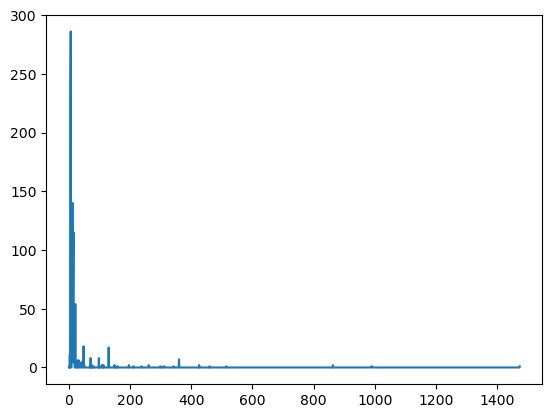

In [227]:
cluster_df['n_characterized'].plot()

In [228]:
cluster_df['n_characterized'].mean()

0.7667796610169492

#### Large clusters without characterized sequences

In [229]:
cluster_df[cluster_df['n_characterized']==0].sort_values(by='total_size', ascending=False).head(20)

,cluster,total_size,n_characterized
0,19,198583,0
2,110,57904,0
4,18,22853,0
8,191,19967,0
19,748,3449,0
20,174,2991,0
22,751,2396,0
23,222,2141,0
24,750,1564,0
25,777,1360,0


In [230]:
cluster_df[cluster_df['n_characterized']<10].sort_values(by='total_size', ascending=False).head(20)

,cluster,total_size,n_characterized
0,19,198583,0
1,7,61590,1
2,110,57904,0
4,18,22853,0
7,897,20353,2
8,191,19967,0
9,16,18217,7
10,38,18018,7
11,13,12144,5
16,94,7652,4


#### If there are characterized sequences, what is the average product uniqness?

In [121]:
tps_db_w_products = '../../../tps_db_analysis/data/tps_db_filtered_products.txt'
tps_db_w_products_df = pd.read_csv(tps_db_w_products, sep='\t')

In [122]:
tps_db_w_products_df = tps_db_w_products_df.set_index('id')

In [123]:
tps_db_w_products_df.head()

,name,type,type_general,species,kingdom,product_names,product_counts,most_unique_product_name,most_unique_product_count
id,,,,,,,,,
A0A023J8Z5,Delta guaiene synthase,sesq,sesq,Aquilaria microcarpa,Plantae,δ-guaiene; germacrene A; α-humulene,"[8, 6, 2]",α-humulene,2
A0A059PYD5,Caryophyllene synthase,mono,mono,Artemisia annua,Plantae,β-phellandrene,[13],β-phellandrene,13
A0A067SEC9,Sesquiterpene synthase GALMADRAFT_104215,sesq,sesq,Galerina marginata,Fungi,β-gurjunene,[1],β-gurjunene,1
A0A075FA51,"(+)-copalyl diphosphate synthase 3, chloroplastic",di-int,di,Marrubium vulgare,Plantae,"5α,9α,10β-labda-8(20),13-dien-15-yl diphosphat...",[16],"5α,9α,10β-labda-8(20),13-dien-15-yl diphosphat...",16
A0A075FAK4,Peregrinol diphosphate synthase CPS1,di-int,di,Marrubium vulgare,Plantae,peregrinol diphosphate(3−),[2],peregrinol diphosphate(3−),2


In [107]:
characterized_ids = tps_db_w_products_df['id'].tolist()

In [124]:
most_unique_product_count_means = dict()
for i, cluster in enumerate(clusters):
    most_unique_product_counts = []
    for sequence in cluster:
        if sequence in tps_db_w_products_df.index:
            most_unique_product_counts.append(tps_db_w_products_df.loc[sequence]['most_unique_product_count'])
    if most_unique_product_counts == []:
        most_unique_product_count_mean = 0
    else:
        most_unique_product_count_mean = np.mean(most_unique_product_counts)
    most_unique_product_count_means[i] = most_unique_product_count_mean

In [231]:
cluster_df = cluster_df.merge(pd.DataFrame.from_dict(most_unique_product_count_means, orient='index', columns=['most_unique_product_count_mean']).reset_index(names='cluster'), on='cluster')

In [232]:
cluster_df[cluster_df['most_unique_product_count_mean'] > 0].shape[0]

56

In [233]:
cluster_df[cluster_df['most_unique_product_count_mean'] > 0].sort_values(by=['most_unique_product_count_mean', 'total_size'], ascending=[True, False])

,cluster,total_size,n_characterized,most_unique_product_count_mean
7,897,20353,2,1.000000
33,255,678,2,1.000000
36,262,476,1,1.000000
37,166,452,2,1.000000
81,315,120,1,1.000000
100,1474,81,1,1.000000
160,302,34,1,1.000000
212,317,19,1,1.000000
238,629,15,1,1.000000
299,141,11,1,1.000000


In [234]:
cluster_df = cluster_df.merge(pd.DataFrame(cluster_assignment_df1['cluster'].value_counts()).reset_index().rename(columns={'count': 'network_size'}), how='left', on='cluster')

In [159]:
cluster_df.to_csv('cluster_info.csv')

In [2]:
cluster_df = pd.read_csv('cluster_info.csv', index_col=0)

In [163]:
cluster_df[cluster_df['network_size']>50]

,cluster,total_size,n_characterized,most_unique_product_count_mean,network_size
0,19,198583,0,0.000000,2757
1,7,61590,1,2.000000,1308
2,110,57904,0,0.000000,1239
3,4,44342,11,11.636364,1505
4,18,22853,0,0.000000,497
5,0,20658,238,13.218487,1223
6,1,20456,286,15.604895,1245
7,897,20353,2,1.000000,563
8,191,19967,0,0.000000,971
9,16,18217,7,2.714286,395


In [168]:
cluster_df[cluster_df['total_size']>200].shape

(60, 5)

In [3]:
# Top 100 clusters by the total size
top_100_clusters = cluster_df.sort_values(by='total_size', ascending=False).head(n=100)['cluster'].tolist()

# Cytoscape visualization

- deselect all, reset Z position
- select cluster, change its Z position
- change Z position of characterized
- 1) higlight with assigned color in the network
- 2) zoom to the selection
- 3) keep other nodes visible
    - a) color the types
    - b) color the product uniqness
- 4) hide other nodes
    - a) color the types
    - b) color the product uniqness    

In [4]:
import py4cytoscape as p4c
import pandas as pd
import uuid
from time import sleep

In [5]:
p4c.cytoscape_ping()
p4c.cytoscape_version_info()

You are connected to Cytoscape!


{'apiVersion': 'v1',
 'cytoscapeVersion': '3.10.1',
 'automationAPIVersion': '1.9.0',
 'py4cytoscapeVersion': '1.9.0'}

In [6]:
p4c.set_current_network('ssn.txt_1')

{}

In [188]:
highlight_color = '#ff0066'
default_color = '999999'

In [189]:
all_nodes = p4c.get_all_nodes()

In [201]:
top_100_clusters[0]

19

## Export top 100 biggest clusters

### Highlight in overall picture

In [236]:
cluster_df[cluster_df['cluster']==0]

,cluster,total_size,n_characterized,most_unique_product_count_mean,network_size
5,0,20658,238,13.218487,1223


In [249]:
top_100_clusters[:6]

[19, 7, 110, 4, 18, 0]

In [247]:
p4c.select_nodes(nodes='5', by_col=0)

{'nodes': [39315, 39317, 33221, 39319, 33223], 'edges': []}

In [250]:

for cluster in top_100_clusters[5:]:
    #cluster_nodes = 
    # Select and color nodes
    p4c.select_nodes(nodes=str(cluster), by_col=0)
    cluster_nodes = p4c.get_selected_nodes()
    if cluster_nodes is None:
        print(cluster)
        continue
    p4c.set_node_color_bypass(node_names=cluster_nodes, new_colors=highlight_color)
    p4c.set_node_property_bypass(node_names=cluster_nodes, new_values=500, visual_property='NODE_Z_LOCATION')
    p4c.clear_selection()
    # Export the image
    p4c.export_image(f'C:/Users/terca/OneDrive/Dokumenty/Uni/Mgr/2.rocnik/diplomka/results/results/ssn/50_filtered_5/images/clusters/cluster_{cluster}_0.png', all_graphics_details=False, hide_labels=True, overwrite_file=True, zoom=375)
    
    # Restore
    p4c.clear_node_property_bypass(cluster_nodes, 'NODE_Z_LOCATION')
    p4c.clear_node_property_bypass(cluster_nodes, 'NODE_FILL_COLOR')

### Zoom to the cluster and show characterized types

The cluster nodes will have black thick border.

In [ ]:
#TODO: color characterized and set z location to 1000

In [265]:
p4c.select_nodes(nodes=str(0), by_col=0)

{'nodes': [36847,
  42991,
  42993,
  36849,
  36851,
  42995,
  42997,
  42999,
  36857,
  43001,
  43003,
  12283,
  36859,
  43005,
  36861,
  36863,
  43007,
  43009,
  36865,
  43011,
  36867,
  43013,
  36869,
  43015,
  36871,
  43017,
  36873,
  43019,
  43021,
  32783,
  43023,
  43025,
  32785,
  43027,
  43029,
  43031,
  43033,
  43035,
  43037,
  43039,
  43041,
  43043,
  43045,
  43047,
  43049,
  43051,
  43053,
  43055,
  43057,
  43059,
  43061,
  43063,
  43065,
  18491,
  43067,
  43069,
  43071,
  43073,
  43075,
  14403,
  43077,
  43079,
  43081,
  43083,
  43085,
  43087,
  43089,
  43091,
  32853,
  43093,
  43095,
  43097,
  43099,
  43101,
  43103,
  43105,
  43107,
  43109,
  43111,
  43113,
  32873,
  43115,
  32875,
  43117,
  43119,
  32897,
  12421,
  12423,
  39067,
  14515,
  39093,
  37053,
  37055,
  37057,
  37059,
  37063,
  37065,
  37067,
  37069,
  37071,
  37073,
  14545,
  37075,
  39127,
  37089,
  37091,
  37093,
  37095,
  14569,
  37099,
 

In [267]:
p4c.select_nodes(nodes=1, by_col='characterized')

{'nodes': [42991,
  18417,
  34803,
  42995,
  40947,
  36853,
  34807,
  43001,
  40955,
  43003,
  43005,
  43007,
  38911,
  40961,
  43009,
  43011,
  28679,
  40969,
  43019,
  43021,
  32781,
  43023,
  34831,
  28693,
  28695,
  40983,
  38937,
  28697,
  38939,
  28699,
  43035,
  38941,
  43039,
  38945,
  43041,
  28709,
  34853,
  38949,
  38951,
  43047,
  38953,
  38955,
  43051,
  38957,
  43053,
  43055,
  34863,
  43059,
  41011,
  38965,
  41013,
  34873,
  38969,
  36921,
  43067,
  28731,
  32833,
  43073,
  41025,
  38979,
  32837,
  43077,
  28741,
  43079,
  34889,
  28747,
  43083,
  36939,
  41039,
  12367,
  43087,
  41041,
  28755,
  41043,
  28757,
  36949,
  34901,
  43097,
  36955,
  43099,
  28763,
  34907,
  41053,
  34911,
  43103,
  28767,
  43105,
  43107,
  43109,
  20581,
  20585,
  41065,
  39017,
  28779,
  34925,
  28783,
  28785,
  41073,
  34931,
  41075,
  28789,
  34935,
  28791,
  6265,
  41081,
  28795,
  34943,
  34945,
  39043,
  34951,
  

In [268]:
p4c.select_nodes(nodes=1, by_col='characterized')
characterized_nodes = p4c.get_selected_nodes()

In [274]:
for cluster in top_100_clusters[2:10]:
    print(cluster)
    # Select and color nodes
    p4c.select_nodes(nodes=str(cluster), by_col=0)
    cluster_nodes = p4c.get_selected_nodes()
    if cluster_nodes is None:
        print(cluster)
        continue
    p4c.set_node_property_bypass(node_names=cluster_nodes, new_values=500, visual_property='NODE_Z_LOCATION')
    p4c.set_node_property_bypass(node_names=cluster_nodes, new_values=10, visual_property='NODE_BORDER_WIDTH')
    p4c.set_node_property_bypass(node_names=cluster_nodes, new_values='#0d0000', visual_property='NODE_BORDER_PAINT')
    p4c.set_node_property_bypass(node_names=cluster_nodes, new_values='solid', visual_property='NODE_BORDER_STROKE')

    # Zoom
    p4c.fit_content(selected_only=True)
    
    # Bring up the characterized nodes
    p4c.set_node_property_bypass(node_names=characterized_nodes, new_values=1000, visual_property='NODE_Z_LOCATION')

    p4c.clear_selection()
    
    # Export the image
    p4c.export_image(f'C:/Users/terca/OneDrive/Dokumenty/Uni/Mgr/2.rocnik/diplomka/results/results/ssn/50_filtered_5/images/clusters/cluster_{cluster}_1.png', all_graphics_details=True, hide_labels=True, overwrite_file=True, zoom=150)
    
    # Restore
    p4c.clear_node_property_bypass(cluster_nodes, 'NODE_Z_LOCATION')
    p4c.clear_node_property_bypass(cluster_nodes, 'NODE_BORDER_WIDTH')
    p4c.clear_node_property_bypass(cluster_nodes, 'NODE_BORDER_PAINT')
    p4c.clear_node_property_bypass(cluster_nodes, 'NODE_BORDER_STROKE')

110
4
18
0
1
897
191
16


In [275]:
for cluster in top_100_clusters[10:25]:
    print(cluster)
    # Select and color nodes
    p4c.select_nodes(nodes=str(cluster), by_col=0)
    cluster_nodes = p4c.get_selected_nodes()
    if cluster_nodes is None:
        print(cluster)
        continue
    p4c.set_node_property_bypass(node_names=cluster_nodes, new_values=500, visual_property='NODE_Z_LOCATION')
    p4c.set_node_property_bypass(node_names=cluster_nodes, new_values=10, visual_property='NODE_BORDER_WIDTH')
    p4c.set_node_property_bypass(node_names=cluster_nodes, new_values='#0d0000', visual_property='NODE_BORDER_PAINT')
    p4c.set_node_property_bypass(node_names=cluster_nodes, new_values='solid', visual_property='NODE_BORDER_STROKE')

    # Zoom
    p4c.fit_content(selected_only=True)
    
    # Bring up the characterized nodes
    p4c.set_node_property_bypass(node_names=characterized_nodes, new_values=1000, visual_property='NODE_Z_LOCATION')

    p4c.clear_selection()
    
    # Export the image
    p4c.export_image(f'C:/Users/terca/OneDrive/Dokumenty/Uni/Mgr/2.rocnik/diplomka/results/results/ssn/50_filtered_5/images/clusters/cluster_{cluster}_1.png', all_graphics_details=True, hide_labels=True, overwrite_file=True, zoom=150)
    
    # Restore
    p4c.clear_node_property_bypass(cluster_nodes, 'NODE_Z_LOCATION')
    p4c.clear_node_property_bypass(cluster_nodes, 'NODE_BORDER_WIDTH')
    p4c.clear_node_property_bypass(cluster_nodes, 'NODE_BORDER_PAINT')
    p4c.clear_node_property_bypass(cluster_nodes, 'NODE_BORDER_STROKE')

38
13
2
43
44
9
94
218
12
748
174
23
751
222
750


In [276]:
for cluster in top_100_clusters[25:]:
    print(cluster)
    # Select and color nodes
    p4c.select_nodes(nodes=str(cluster), by_col=0)
    cluster_nodes = p4c.get_selected_nodes()
    if cluster_nodes is None:
        print(cluster)
        continue
    p4c.set_node_property_bypass(node_names=cluster_nodes, new_values=500, visual_property='NODE_Z_LOCATION')
    p4c.set_node_property_bypass(node_names=cluster_nodes, new_values=10, visual_property='NODE_BORDER_WIDTH')
    p4c.set_node_property_bypass(node_names=cluster_nodes, new_values='#0d0000', visual_property='NODE_BORDER_PAINT')
    p4c.set_node_property_bypass(node_names=cluster_nodes, new_values='solid', visual_property='NODE_BORDER_STROKE')

    # Zoom
    p4c.fit_content(selected_only=True)
    
    # Bring up the characterized nodes
    p4c.set_node_property_bypass(node_names=characterized_nodes, new_values=1000, visual_property='NODE_Z_LOCATION')

    p4c.clear_selection()
    
    # Export the image
    p4c.export_image(f'C:/Users/terca/OneDrive/Dokumenty/Uni/Mgr/2.rocnik/diplomka/results/results/ssn/50_filtered_5/images/clusters/cluster_{cluster}_1.png', all_graphics_details=True, hide_labels=True, overwrite_file=True, zoom=150)
    
    # Restore
    p4c.clear_node_property_bypass(cluster_nodes, 'NODE_Z_LOCATION')
    p4c.clear_node_property_bypass(cluster_nodes, 'NODE_BORDER_WIDTH')
    p4c.clear_node_property_bypass(cluster_nodes, 'NODE_BORDER_PAINT')
    p4c.clear_node_property_bypass(cluster_nodes, 'NODE_BORDER_STROKE')

777
24
39
36
45
352
268
20
255
265
321
262
166
56
553
744
779
83
276
35
330
1169
338
259
224
3
1173
1152
747
551
217
1134
756
366
275
789
620
483
599
1187
349
835
480
863
122
1198
343
923
816
494
6
486
53
884
754
274
315
745
231
339
596
742
414
836
346
790
468
240
841
853
455
557
130
92
233


### Create subnetworks 

In [8]:
top_100_clusters

[19,
 7,
 110,
 4,
 18,
 0,
 1,
 897,
 191,
 16,
 38,
 13,
 2,
 43,
 44,
 9,
 94,
 218,
 12,
 748,
 174,
 23,
 751,
 222,
 750,
 777,
 24,
 39,
 36,
 45,
 352,
 268,
 20,
 255,
 265,
 321,
 262,
 166,
 56,
 553,
 744,
 779,
 83,
 276,
 35,
 330,
 1169,
 338,
 259,
 224,
 3,
 1173,
 1152,
 747,
 551,
 217,
 1134,
 756,
 366,
 275,
 789,
 620,
 483,
 599,
 1187,
 349,
 835,
 480,
 863,
 122,
 1198,
 343,
 923,
 816,
 494,
 6,
 486,
 53,
 884,
 754,
 274,
 315,
 745,
 231,
 339,
 596,
 742,
 414,
 836,
 346,
 790,
 468,
 240,
 841,
 853,
 455,
 557,
 130,
 92,
 233]

In [11]:
cluster = top_100_clusters[1]

In [7]:
for cluster in top_100_clusters[:20]:
    p4c.create_subnetwork(nodes=cluster, nodes_by_col=0, network='ssn.txt_1', subnetwork_name=f'cluster_{cluster}')

In [9]:
for cluster in top_100_clusters[20:40]:
    print(cluster)
    p4c.create_subnetwork(nodes=cluster, nodes_by_col=0, network='ssn.txt_1', subnetwork_name=f'cluster_{cluster}')

174
23
751
222
750
777
24
39
36
45
352
268
20
255
265
321
262
166
56
553


In [10]:
for cluster in top_100_clusters[40:60]:
    print(cluster)
    p4c.create_subnetwork(nodes=cluster, nodes_by_col=0, network='ssn.txt_1', subnetwork_name=f'cluster_{cluster}')

744
779
83
276
35
330
1169
338
259
224
3
1173
1152
747
551
217
1134
756
366
275


In [11]:
for cluster in top_100_clusters[60:80]:
    print(cluster)
    p4c.create_subnetwork(nodes=cluster, nodes_by_col=0, network='ssn.txt_1', subnetwork_name=f'cluster_{cluster}')

789
620
483
599
1187
349
835
480
863
122
1198
343
923
816
494
6
486
53
884
754


In [12]:
for cluster in top_100_clusters[80:]:
    print(cluster)
    p4c.create_subnetwork(nodes=cluster, nodes_by_col=0, network='ssn.txt_1', subnetwork_name=f'cluster_{cluster}')

274
315
745
231
339
596
742
414
836
346
790
468
240
841
853
455
557
130
92
233


## Show characterized sequences in the subnetworks and export

### p1 (0-19)

In [16]:
for cluster in top_100_clusters[:20]:
    p4c.set_current_network(f'cluster_{cluster}')
    p4c.export_image(f'C:/Users/terca/OneDrive/Dokumenty/Uni/Mgr/2.rocnik/diplomka/results/results/ssn/50_filtered_5/images/clusters/cluster_{cluster}_2.png', all_graphics_details=False, hide_labels=True, overwrite_file=True, zoom=150)
    print(cluster)

19
7
110
4
18
0
1
897
191
16
38
13
2
43
44
9
94
218
12
748


### p2 (20-39)

In [17]:
for cluster in top_100_clusters[20:40]:
    p4c.set_current_network(f'cluster_{cluster}')
    p4c.export_image(f'C:/Users/terca/OneDrive/Dokumenty/Uni/Mgr/2.rocnik/diplomka/results/results/ssn/50_filtered_5/images/clusters/cluster_{cluster}_2.png', all_graphics_details=False, hide_labels=True, overwrite_file=True, zoom=150)
    print(cluster)

174
23
751
222
750
777
24
39
36
45
352
268
20
255
265
321
262
166
56
553


In [18]:
for cluster in top_100_clusters[40:60]:
    p4c.set_current_network(f'cluster_{cluster}')
    p4c.export_image(f'C:/Users/terca/OneDrive/Dokumenty/Uni/Mgr/2.rocnik/diplomka/results/results/ssn/50_filtered_5/images/clusters/cluster_{cluster}_2.png', all_graphics_details=False, hide_labels=True, overwrite_file=True, zoom=150)
    print(cluster)

744
779
83
276
35
330
1169
338
259
224
3
1173
1152
747
551
217
1134
756
366
275


In [22]:
for cluster in top_100_clusters[60:80]:
    p4c.set_current_network(f'cluster_{cluster}')
    p4c.export_image(f'C:/Users/terca/OneDrive/Dokumenty/Uni/Mgr/2.rocnik/diplomka/results/results/ssn/50_filtered_5/images/clusters/cluster_{cluster}_2.png', all_graphics_details=False, hide_labels=True, overwrite_file=True, zoom=150)
    print(cluster)

789
620
483
599
1187
349
835
480
863
122
1198
343
923
816
494
6
486
53
884
754


In [21]:
for cluster in top_100_clusters[80:100]:
    p4c.set_current_network(f'cluster_{cluster}')
    p4c.export_image(f'C:/Users/terca/OneDrive/Dokumenty/Uni/Mgr/2.rocnik/diplomka/results/results/ssn/50_filtered_5/images/clusters/cluster_{cluster}_2.png', all_graphics_details=False, hide_labels=True, overwrite_file=True, zoom=150)
    print(cluster)

274
315
745
231
339
596
742
414
836
346
790
468
240
841
853
455
557
130
92
233


## Show product uniqness in the subnetworks

In [24]:
for cluster in top_100_clusters[:20]:
    p4c.set_current_network(f'cluster_{cluster}')
    p4c.export_image(f'C:/Users/terca/OneDrive/Dokumenty/Uni/Mgr/2.rocnik/diplomka/results/results/ssn/50_filtered_5/images/clusters/cluster_{cluster}_3.png', all_graphics_details=False, hide_labels=True, overwrite_file=True, zoom=150)
    print(cluster)

19
7
110
4
18
0
1
897
191
16
38
13
2
43
44
9
94
218
12
748


In [28]:
for cluster in top_100_clusters[20:40]:
    p4c.set_current_network(f'cluster_{cluster}')
    p4c.export_image(f'C:/Users/terca/OneDrive/Dokumenty/Uni/Mgr/2.rocnik/diplomka/results/results/ssn/50_filtered_5/images/clusters/cluster_{cluster}_3.png', all_graphics_details=False, hide_labels=True, overwrite_file=True, zoom=150)
    print(cluster)

174
23
751
222
750
777
24
39
36
45
352
268
20
255
265
321
262
166
56
553


In [29]:
for cluster in top_100_clusters[40:60]:
    p4c.set_current_network(f'cluster_{cluster}')
    p4c.export_image(f'C:/Users/terca/OneDrive/Dokumenty/Uni/Mgr/2.rocnik/diplomka/results/results/ssn/50_filtered_5/images/clusters/cluster_{cluster}_3.png', all_graphics_details=False, hide_labels=True, overwrite_file=True, zoom=150)
    print(cluster)

744
779
83
276
35
330
1169
338
259
224
3
1173
1152
747
551
217
1134
756
366
275


In [23]:
for cluster in top_100_clusters[60:80]:
    p4c.set_current_network(f'cluster_{cluster}')
    p4c.export_image(f'C:/Users/terca/OneDrive/Dokumenty/Uni/Mgr/2.rocnik/diplomka/results/results/ssn/50_filtered_5/images/clusters/cluster_{cluster}_3.png', all_graphics_details=False, hide_labels=True, overwrite_file=True, zoom=150)
    print(cluster)

789
620
483
599
1187
349
835
480
863
122
1198
343
923
816
494
6
486
53
884
754


In [30]:
for cluster in top_100_clusters[80:]:
    p4c.set_current_network(f'cluster_{cluster}')
    p4c.export_image(f'C:/Users/terca/OneDrive/Dokumenty/Uni/Mgr/2.rocnik/diplomka/results/results/ssn/50_filtered_5/images/clusters/cluster_{cluster}_3.png', all_graphics_details=False, hide_labels=True, overwrite_file=True, zoom=150)
    print(cluster)

274
315
745
231
339
596
742
414
836
346
790
468
240
841
853
455
557
130
92
233
